In [ ]:
import pandas as pd
df=pd.read_csv('adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


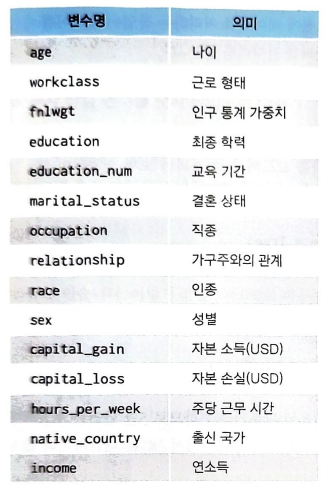

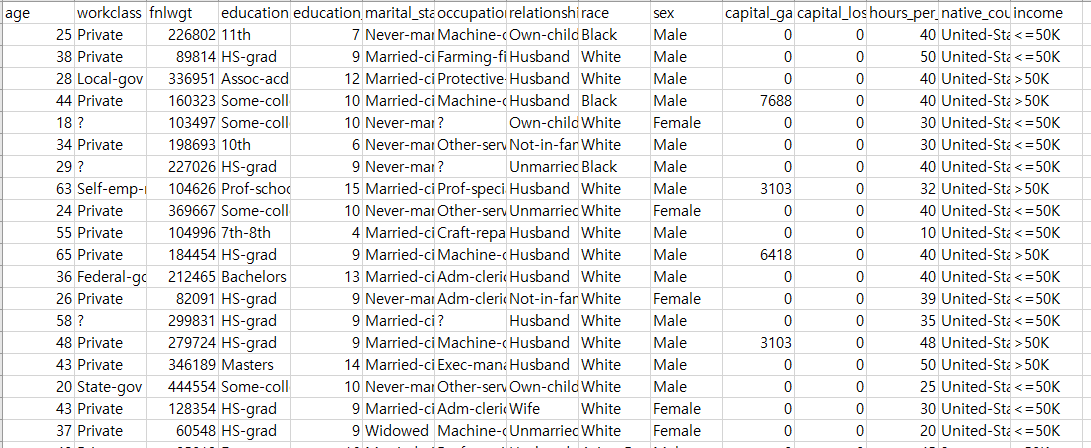

In [ ]:
df['income'].value_counts(normalize=True) # 범주의 비율을 구해줌

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [ ]:
import numpy as np
df['income']=np.where(df['income']=='>50K','high','low')
df['income'].value_counts(normalize=True)

low     0.760718
high    0.239282
Name: income, dtype: float64

In [ ]:
df=df.drop(columns='fnlwgt')

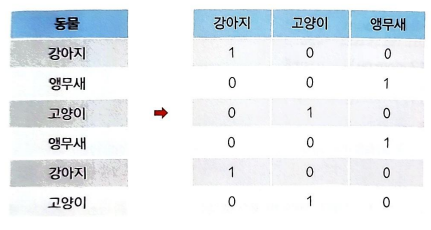

In [ ]:
df_tmp=df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [ ]:
df_tmp['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [ ]:
#df_tmp의 문자 타입 변수에 원핫 인코딩 적용
df_tmp=pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  uint8
 1   sex_Male    48842 non-null  uint8
dtypes: uint8(2)
memory usage: 95.5 KB


In [ ]:
df_tmp[['sex_Female','sex_Male']].head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
target=df['income']
df=df.drop(columns='income')
df=pd.get_dummies(df)

df['income']=target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: int64(5), object(1), uint8(102)
memory usage: 7.0+ MB


In [ ]:
import numpy as np
df.info(max_cols=np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  uint8 
 6    workclass_Federal-gov                      48842 non-null  uint8 
 7    workclass_Local-gov                        48842 non-null  uint8 
 8    workclass_Never-worked                     48842 non-null  uint8 
 9    workclass_Private                          48842 non-null  uint8 
 10   workclass_Self-emp-i

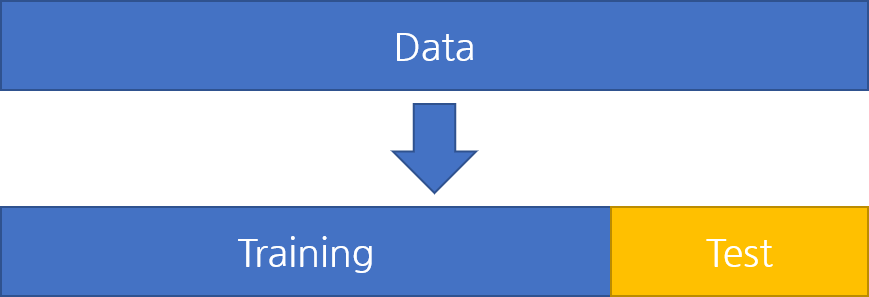

In [ ]:
from sklearn.model_selection import train_test_split #train_test_split 테스트 set 분할

In [ ]:
df_train, df_test=train_test_split(df, test_size=0.3, stratify=df['income'], random_state=1234)

In [ ]:
#train
df_train.shape

(34189, 108)

In [ ]:
#test
df_test.shape

(14653, 108)

In [ ]:
df_train['income'].value_counts(normalize=True)

low     0.760713
high    0.239287
Name: income, dtype: float64

In [ ]:
df_test['income'].value_counts(normalize=True)

low     0.760732
high    0.239268
Name: income, dtype: float64

In [ ]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=1234, max_depth=3)

In [ ]:
train_x=df_train.drop(columns='income')
train_y=df_train['income']

model=clf.fit(X=train_x, y=train_y)

[Text(0.5, 0.875, 'x[32] <= 0.5\ngini = 0.364\nsamples = 34189\nvalue = [8181, 26008]'),
 Text(0.25, 0.625, 'x[2] <= 7073.5\ngini = 0.12\nsamples = 18525\nvalue = [1187, 17338]'),
 Text(0.125, 0.375, 'x[1] <= 13.5\ngini = 0.092\nsamples = 18210\nvalue = [885, 17325]'),
 Text(0.0625, 0.125, 'gini = 0.071\nsamples = 17204\nvalue = [637, 16567]'),
 Text(0.1875, 0.125, 'gini = 0.371\nsamples = 1006\nvalue = [248, 758]'),
 Text(0.375, 0.375, 'x[0] <= 20.0\ngini = 0.079\nsamples = 315\nvalue = [302, 13]'),
 Text(0.3125, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4375, 0.125, 'gini = 0.056\nsamples = 310\nvalue = [301, 9]'),
 Text(0.75, 0.625, 'x[1] <= 12.5\ngini = 0.494\nsamples = 15664\nvalue = [6994, 8670]'),
 Text(0.625, 0.375, 'x[2] <= 5095.5\ngini = 0.442\nsamples = 11002\nvalue = [3634, 7368]'),
 Text(0.5625, 0.125, 'gini = 0.418\nsamples = 10472\nvalue = [3115, 7357]'),
 Text(0.6875, 0.125, 'gini = 0.041\nsamples = 530\nvalue = [519, 11]'),
 Text(0.875, 0.375, 'x[2] <

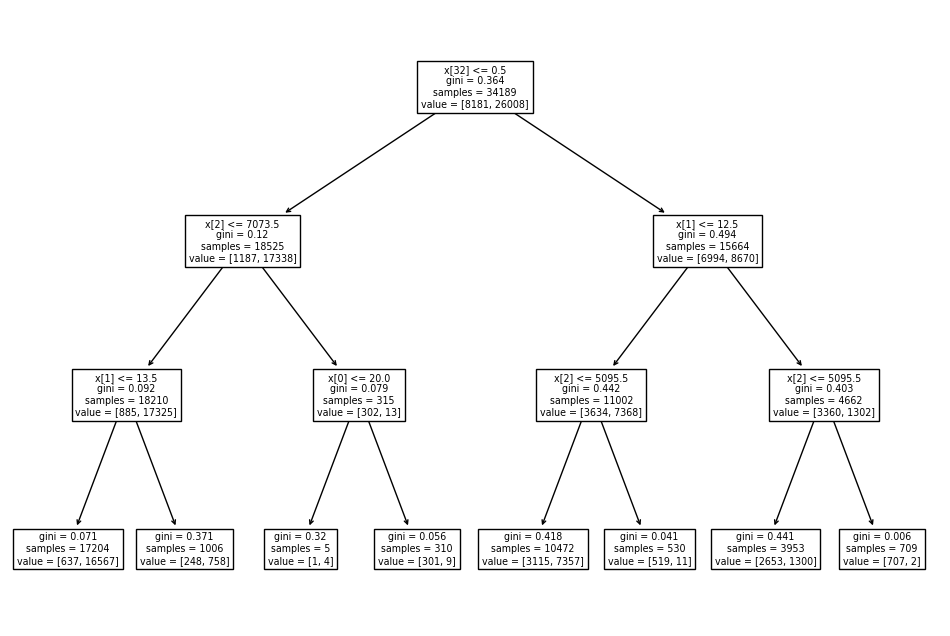

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':[12,8],
                     'figure.dpi': '100'})
tree.plot_tree(model)

[Text(0.5, 0.875, 'marital_status_Married-civ-spouse <= 0.5\nsamples = 100.0%\nvalue = [0.239, 0.761]\nclass = low'),
 Text(0.25, 0.625, 'capital_gain <= 7073.5\n54.2%\n[0.064, 0.936]\nlow'),
 Text(0.125, 0.375, 'education_num <= 13.5\n53.3%\n[0.049, 0.951]\nlow'),
 Text(0.0625, 0.125, '50.3%\n[0.037, 0.963]\nlow'),
 Text(0.1875, 0.125, '2.9%\n[0.247, 0.753]\nlow'),
 Text(0.375, 0.375, 'age <= 20.0\n0.9%\n[0.959, 0.041]\nhigh'),
 Text(0.3125, 0.125, '0.0%\n[0.2, 0.8]\nlow'),
 Text(0.4375, 0.125, '0.9%\n[0.971, 0.029]\nhigh'),
 Text(0.75, 0.625, 'education_num <= 12.5\n45.8%\n[0.447, 0.553]\nlow'),
 Text(0.625, 0.375, 'capital_gain <= 5095.5\n32.2%\n[0.33, 0.67]\nlow'),
 Text(0.5625, 0.125, '30.6%\n[0.297, 0.703]\nlow'),
 Text(0.6875, 0.125, '1.6%\n[0.979, 0.021]\nhigh'),
 Text(0.875, 0.375, 'capital_gain <= 5095.5\n13.6%\n[0.721, 0.279]\nhigh'),
 Text(0.8125, 0.125, '11.6%\n[0.671, 0.329]\nhigh'),
 Text(0.9375, 0.125, '2.1%\n[0.997, 0.003]\nhigh')]

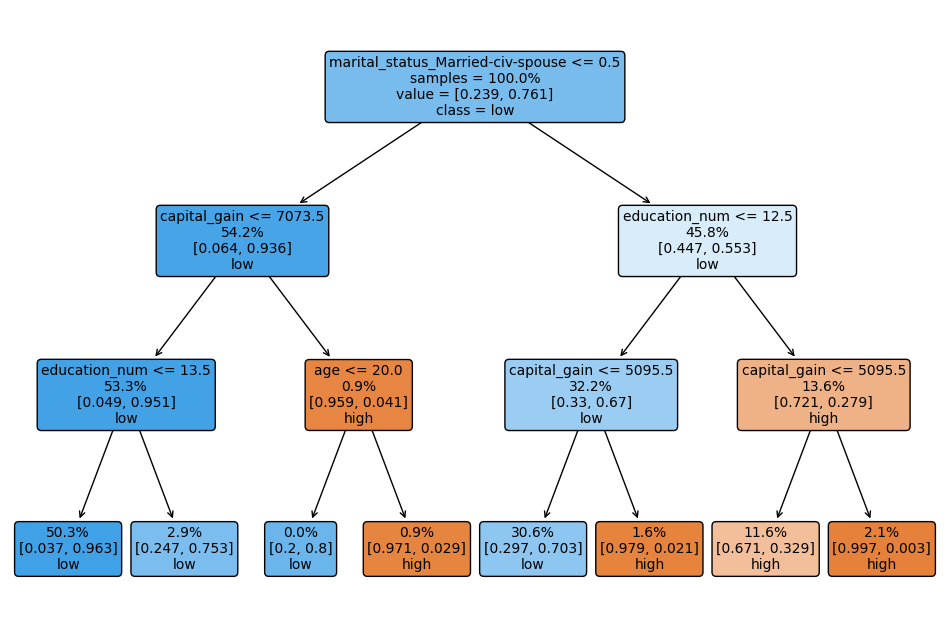

In [ ]:
tree.plot_tree(model,
               feature_names = train_x.columns,
               class_names=["high","low"],
               proportion = True,
               filled = True,
               rounded=True,
               impurity=False,
               label='root',
               fontsize=10)

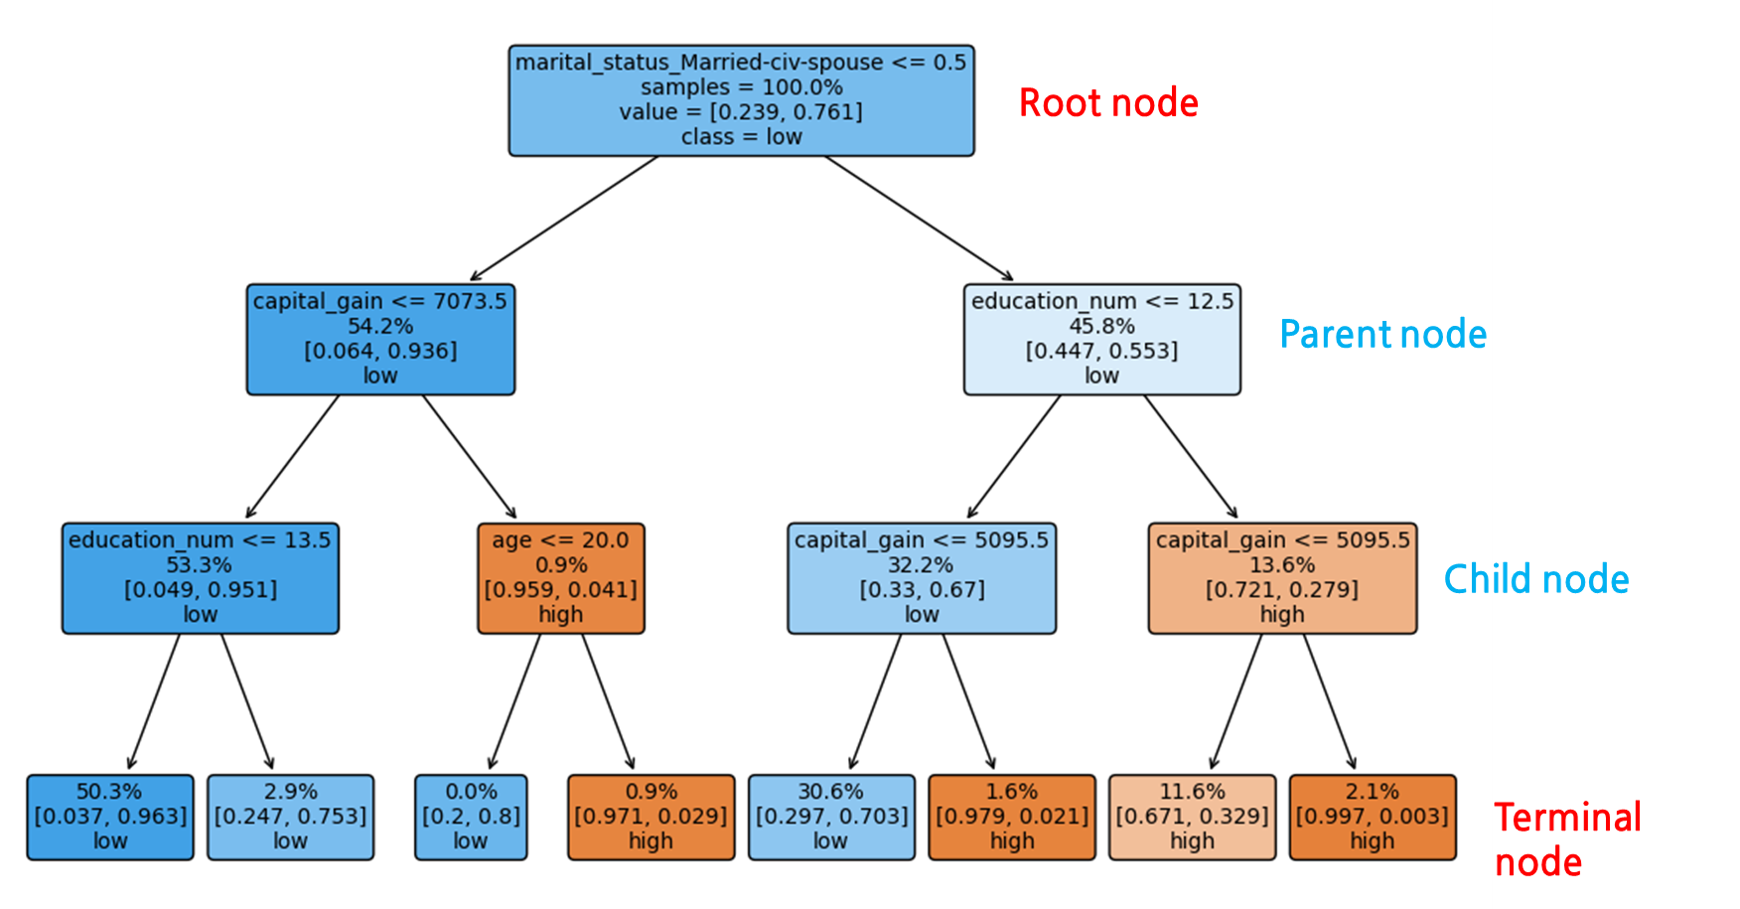

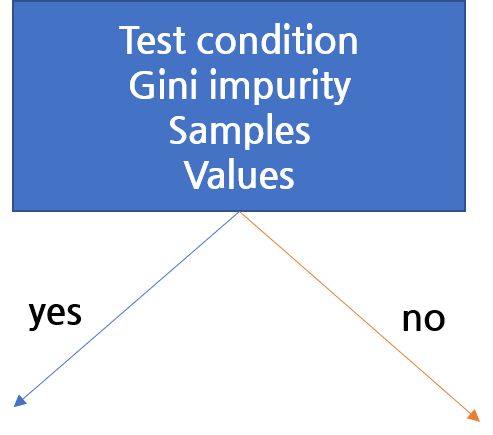

In [ ]:
test_x=df_test.drop(columns='income')
test_y=df_test['income']

In [ ]:
#예측값 구하기
df_test['pred']=model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,1,0,0,low,low
24768,39,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low
26758,31,4,0,0,20,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
14295,23,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
3683,24,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
48445,35,13,10520,0,45,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,high
19639,41,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,low
21606,29,4,0,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low


In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_true=df_test['income'], # 실제값
                          y_pred=df_test['pred'], # 예측값
                          labels=['high', 'low']) # 클래스 배치 순서
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

from sklearn.metrics import ConfusionMatrixDisplay
p=ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                         display_labels=('high', 'low'))
p.plot(cmap='Blues')

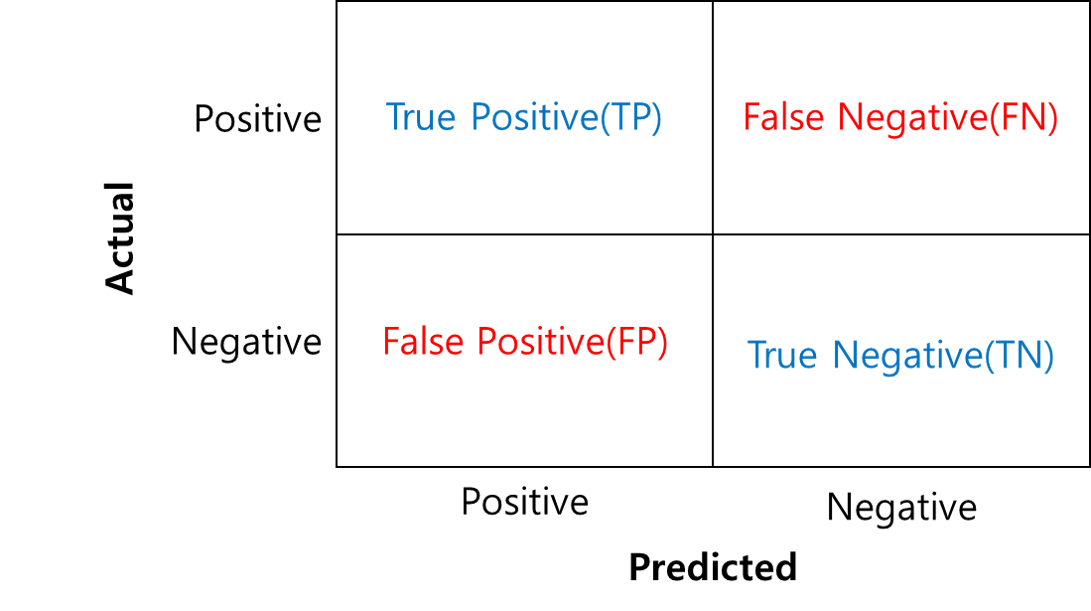

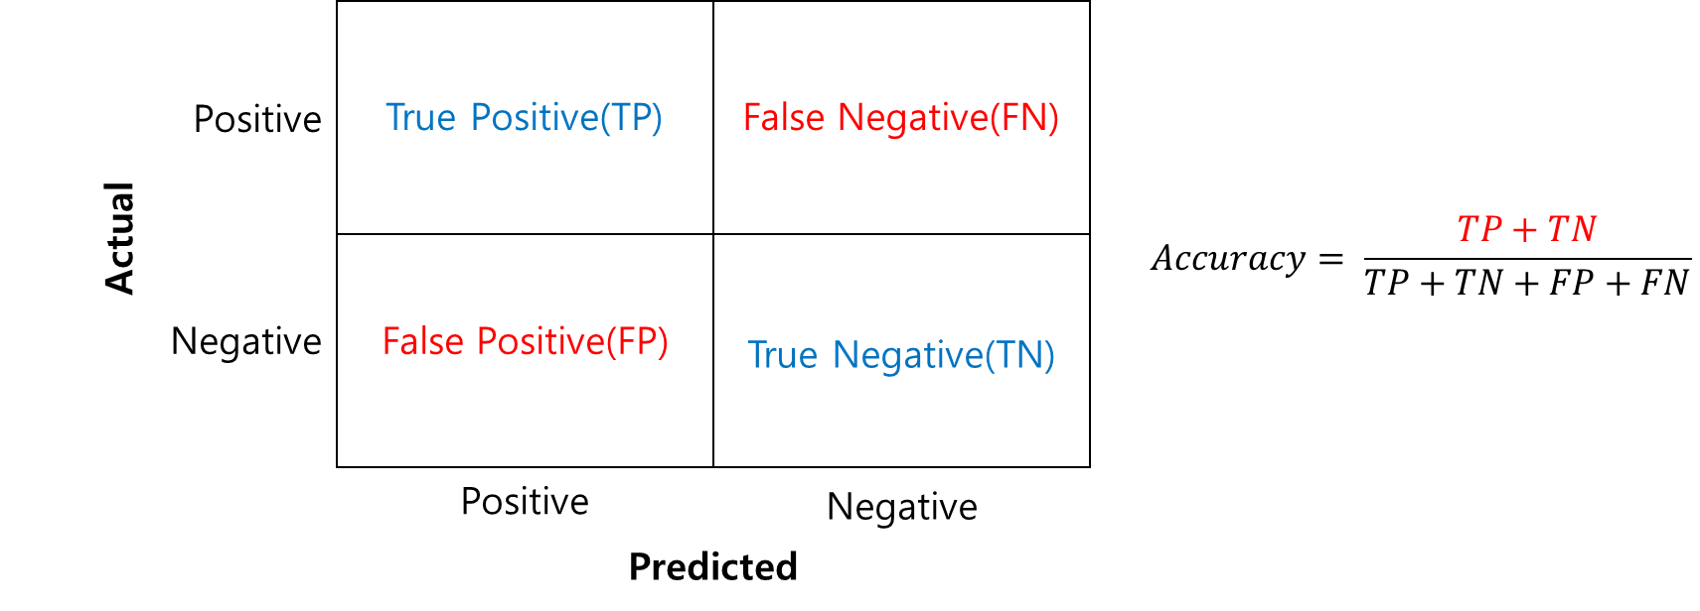

In [ ]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true=df_test['income'],
                       y_pred=df_test['pred'])

0.8439227461953184

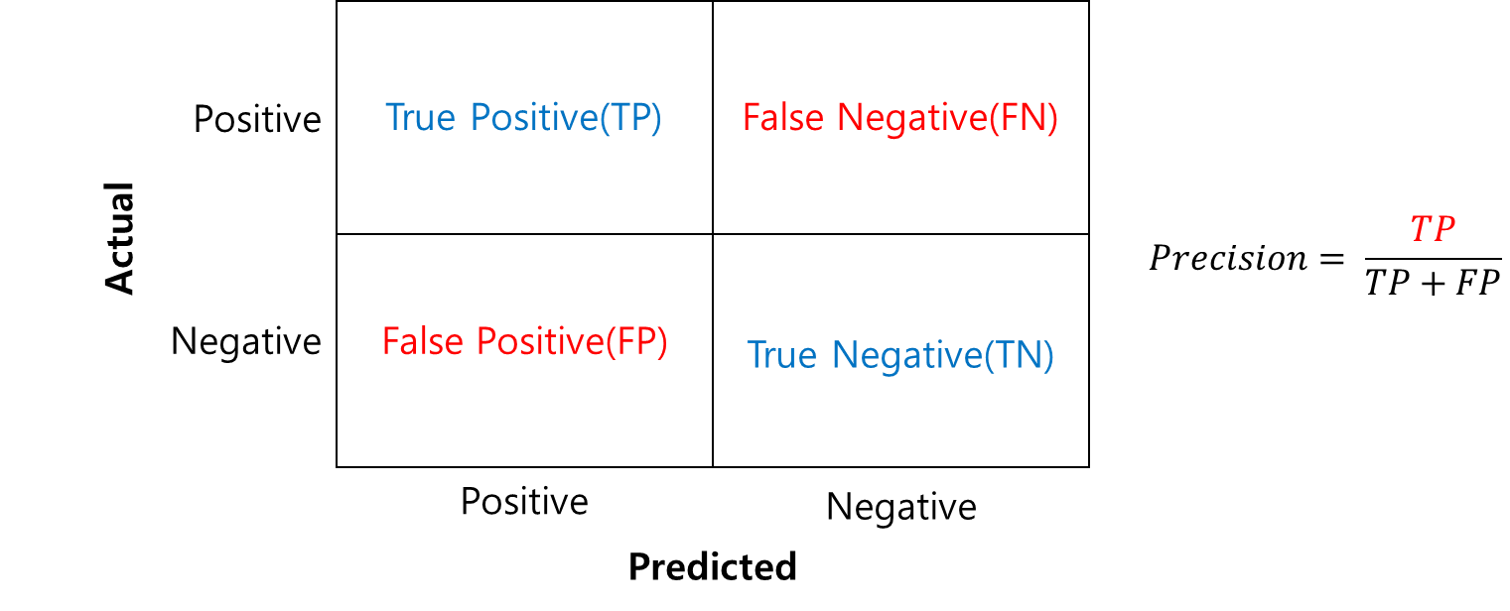

In [ ]:
metrics.precision_score(y_true=df_test['income'],
                        y_pred=df_test['pred'],
                        pos_label='high')

0.7557700377675199

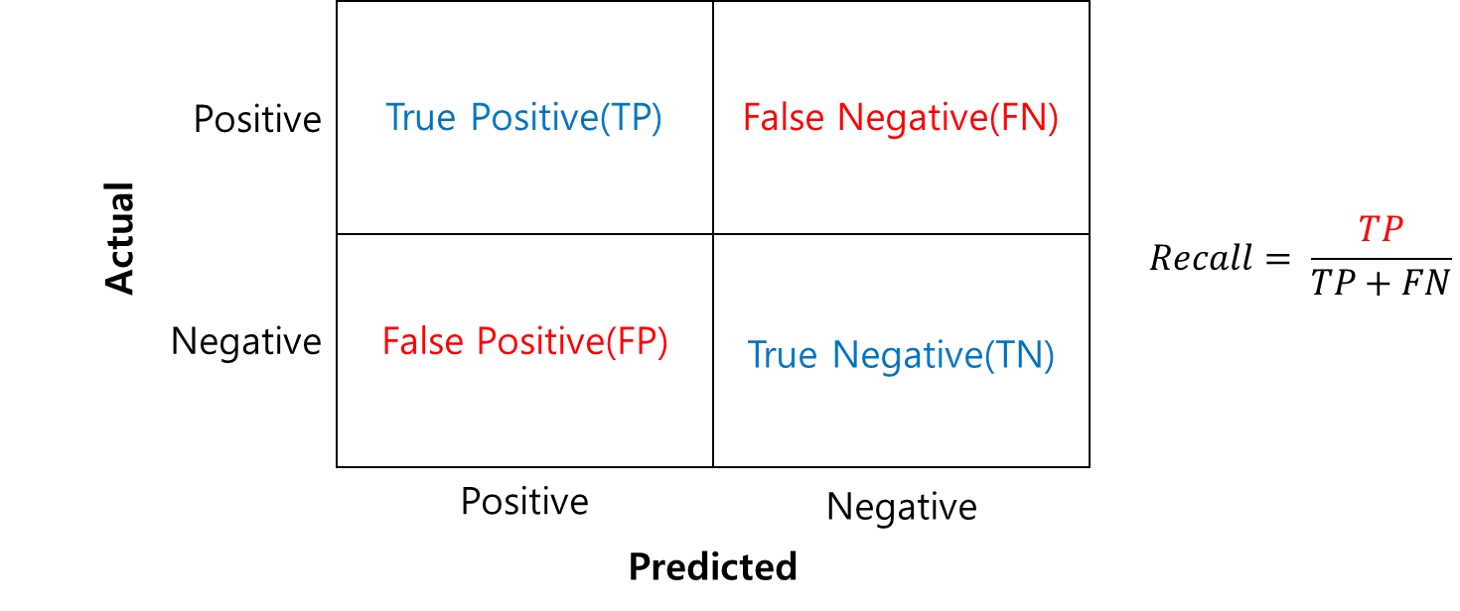

In [ ]:
metrics.recall_score(y_true=df_test['income'],
                        y_pred=df_test['pred'],
                        pos_label='high')

0.5136908157444381

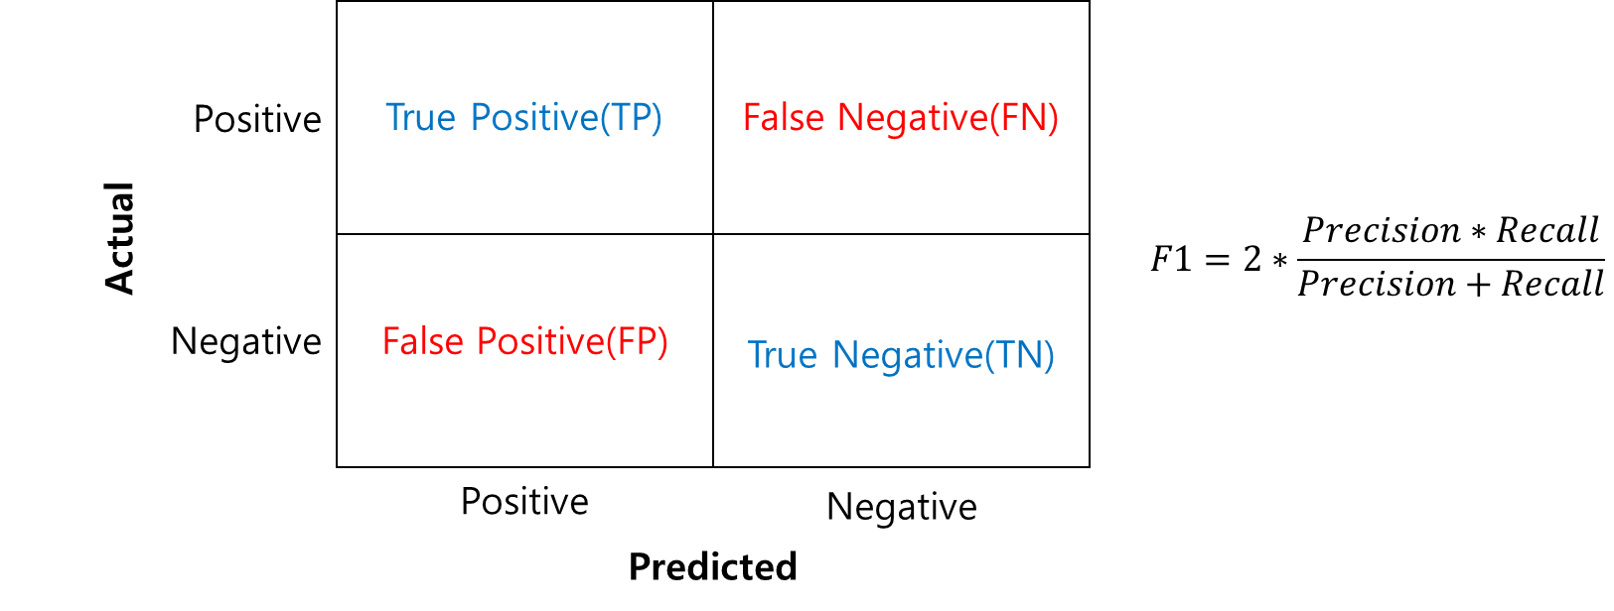

In [ ]:
metrics.f1_score(y_true=df_test['income'],
                        y_pred=df_test['pred'],
                        pos_label='high')

0.6116488368143997